# Explore

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#### Load Data

In [2]:
# Load data
student_mat = pd.read_csv('datasets/student-mat.csv', delimiter=';')
student_por = pd.read_csv('datasets/student-por.csv', delimiter=';')

In [3]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### Describe Numerical Features

In [15]:
# Numerical Columns
numerical_columns = ['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

In [17]:
student_mat[numerical_columns].describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
student_por[numerical_columns].describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,1.930663,0.221880,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.748660,0.829510,0.593235,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

#### Analyse Numerical Features

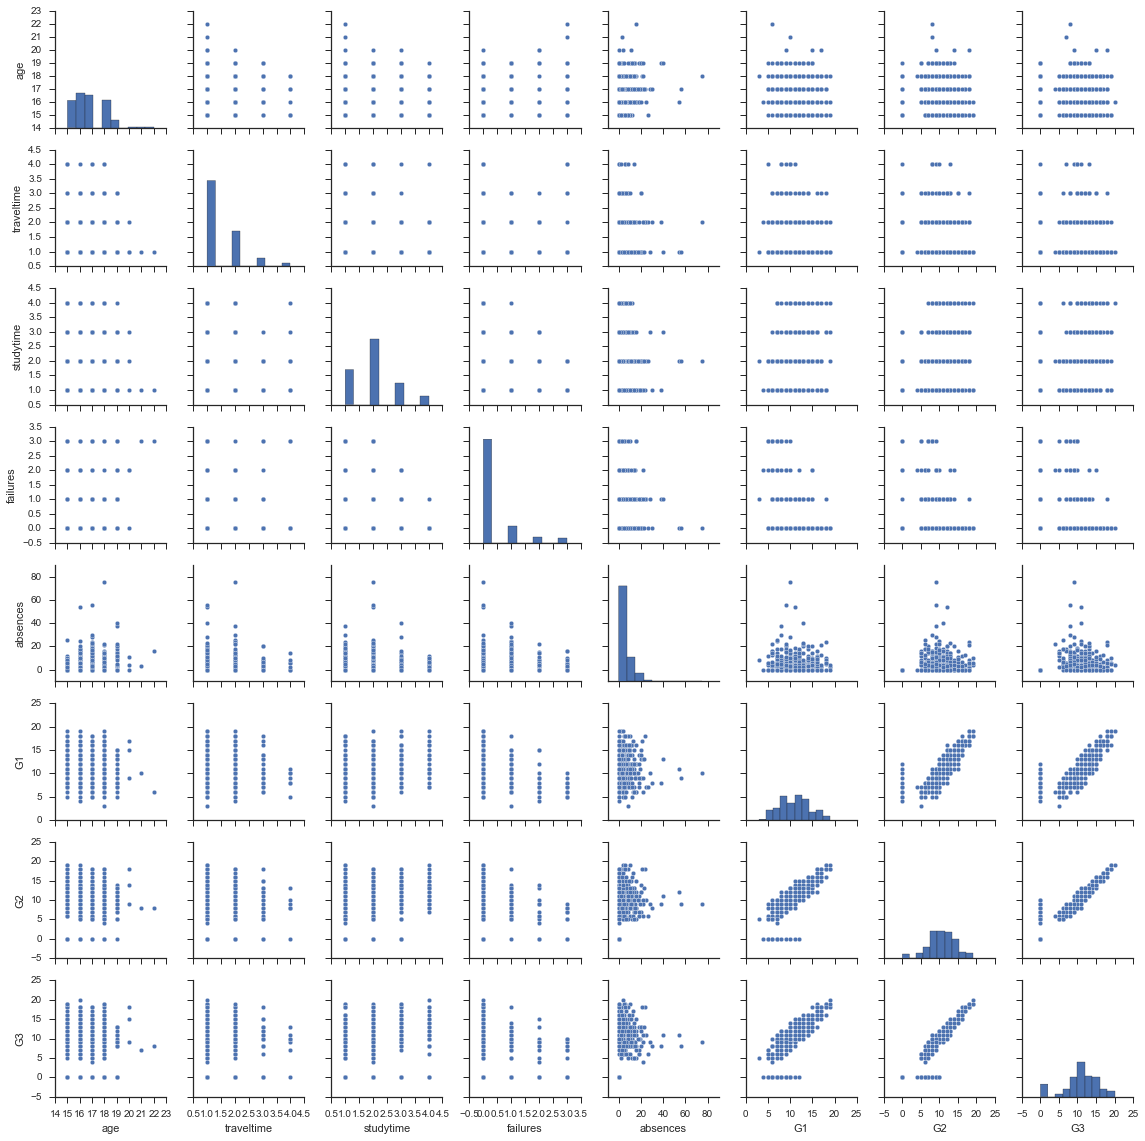

In [6]:
plt.rcParams['figure.figsize']=(10,10)
g = sns.pairplot(student_mat[['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']],size=2)

#### Analysis by student sex

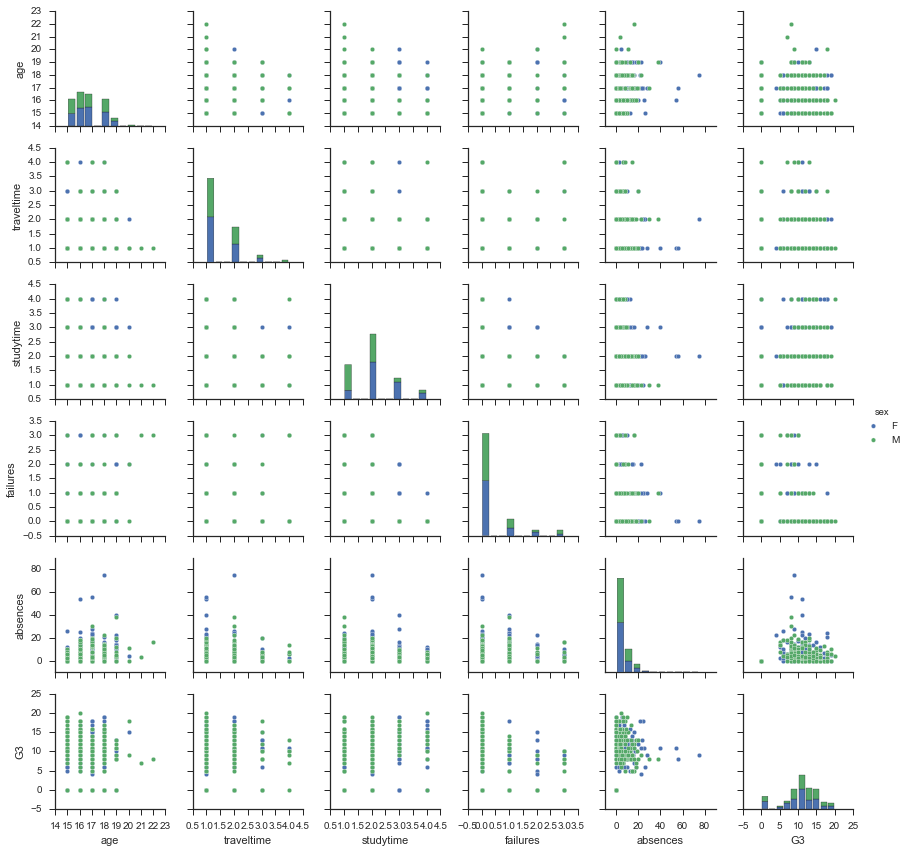

In [7]:
g = sns.pairplot(student_mat[['age', 'traveltime', 'studytime', 'failures', 'absences', 'sex', 'G3']],hue='sex',size=2)

#### Analysis by address - Rural or Urban

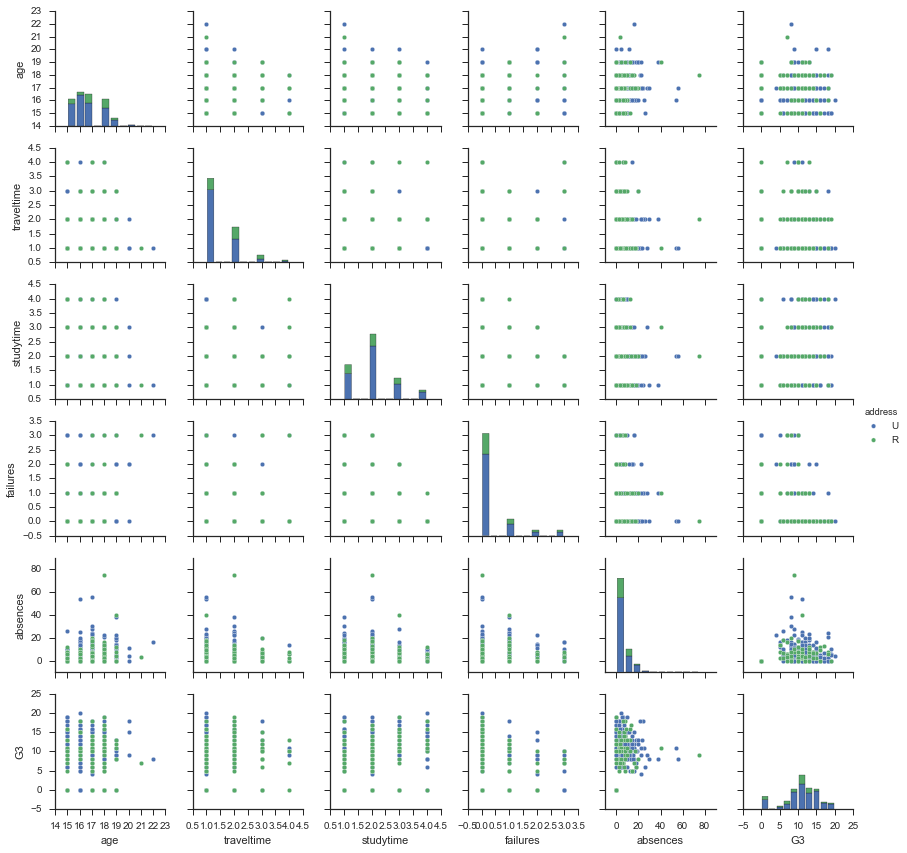

In [8]:
g = sns.pairplot(student_mat[['age', 'traveltime', 'studytime', 'failures', 'absences', 'address', 'G3']],hue='address',size=2)

#### Analysis by Family Size

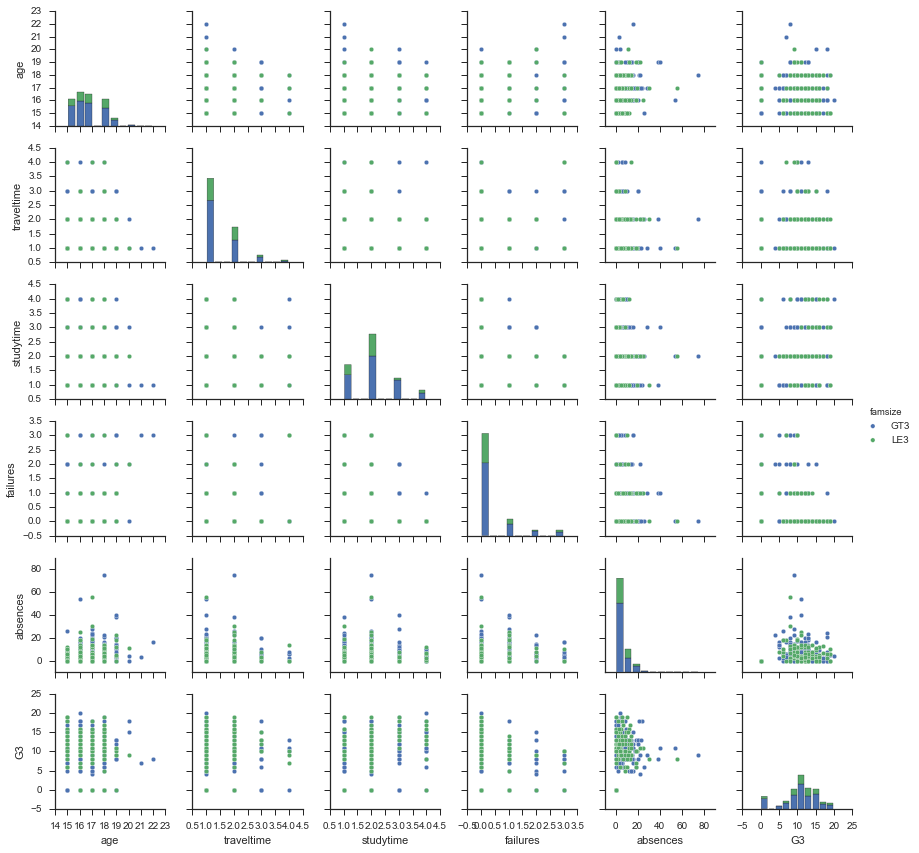

In [9]:
g = sns.pairplot(student_mat[['age', 'traveltime', 'studytime', 'failures', 'absences', 'famsize', 'G3']],hue='famsize',size=2)

#### Correlation

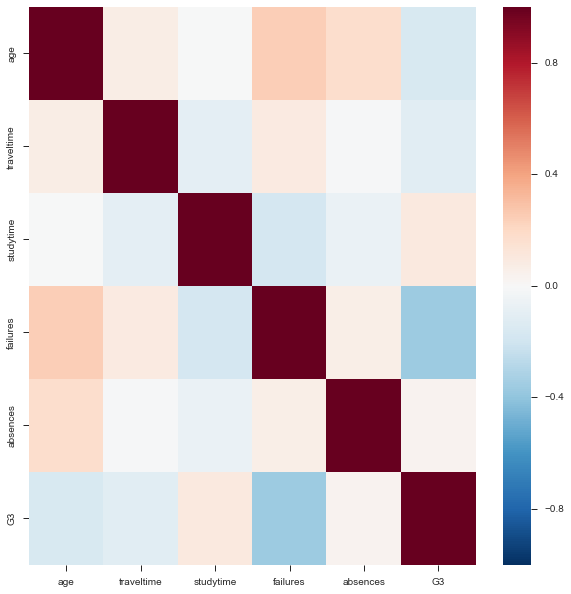

In [10]:
corr = student_mat[['age', 'traveltime', 'studytime', 'failures', 'absences', 'G3']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Correlation of all Features

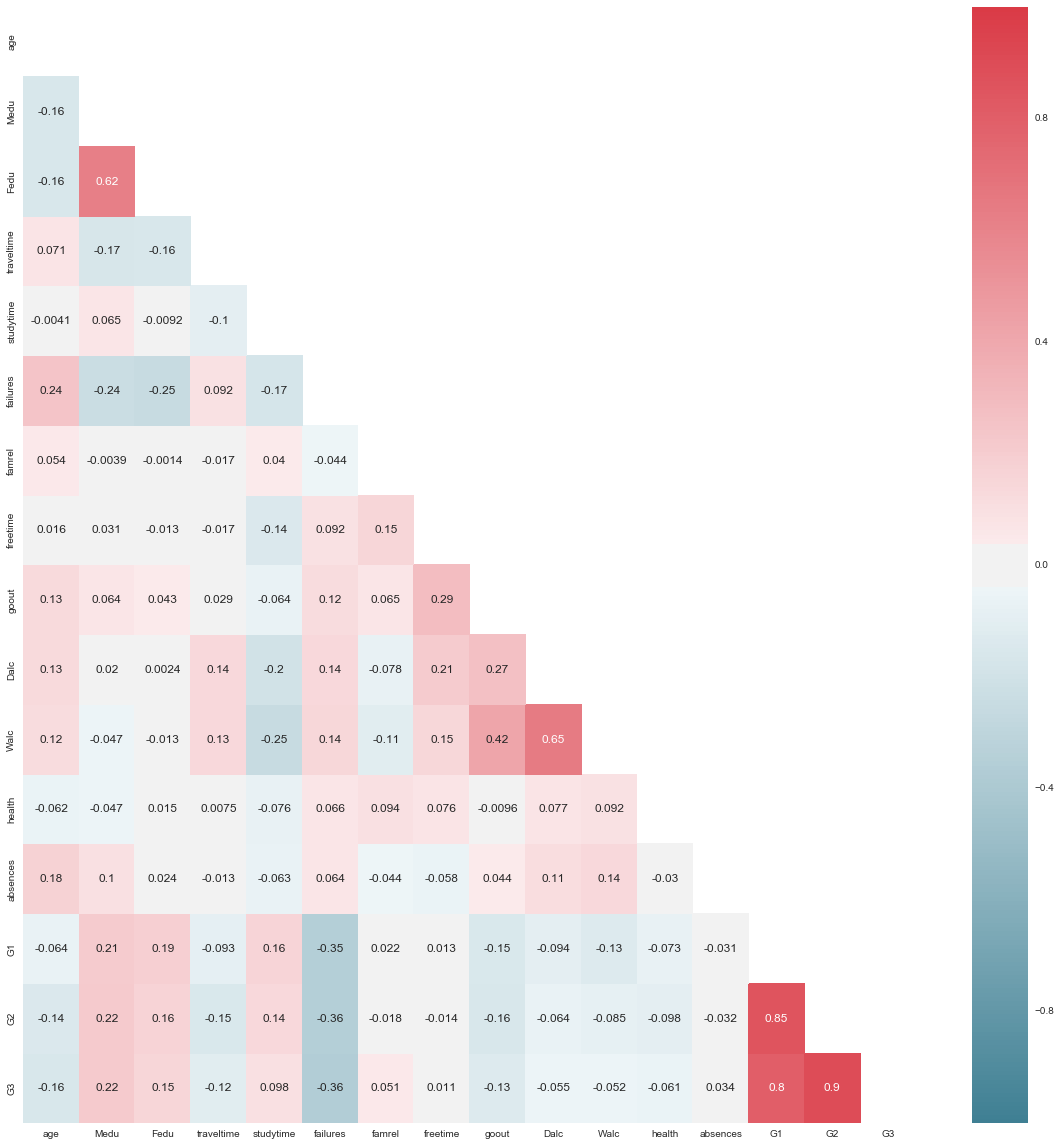

In [11]:
corr = student_mat.corr()

sns.set(style="white")
f, ax = plt.subplots(figsize=(20, 20))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax , annot=True)

From the correlation matrix we can see that 
- Fedu and Medu have a high positive correlation
- Failures and all Grades have a high negative correlation
- Fedu and Medu has some possitve correlation with grades
- The Grades are highly correlated to each other which makes sense as students will moslty perform in the same grade range for all exams
- Failure and age has a possitve correlation
- Fedu and Medu has a negative correlation with failures
- Fedu and Medu has a negative correlation with traveltime
- Walc and Dalc has high positive correlation
- goout has a high positive correlation with walc and dalc


Looking at just the variables with correlation

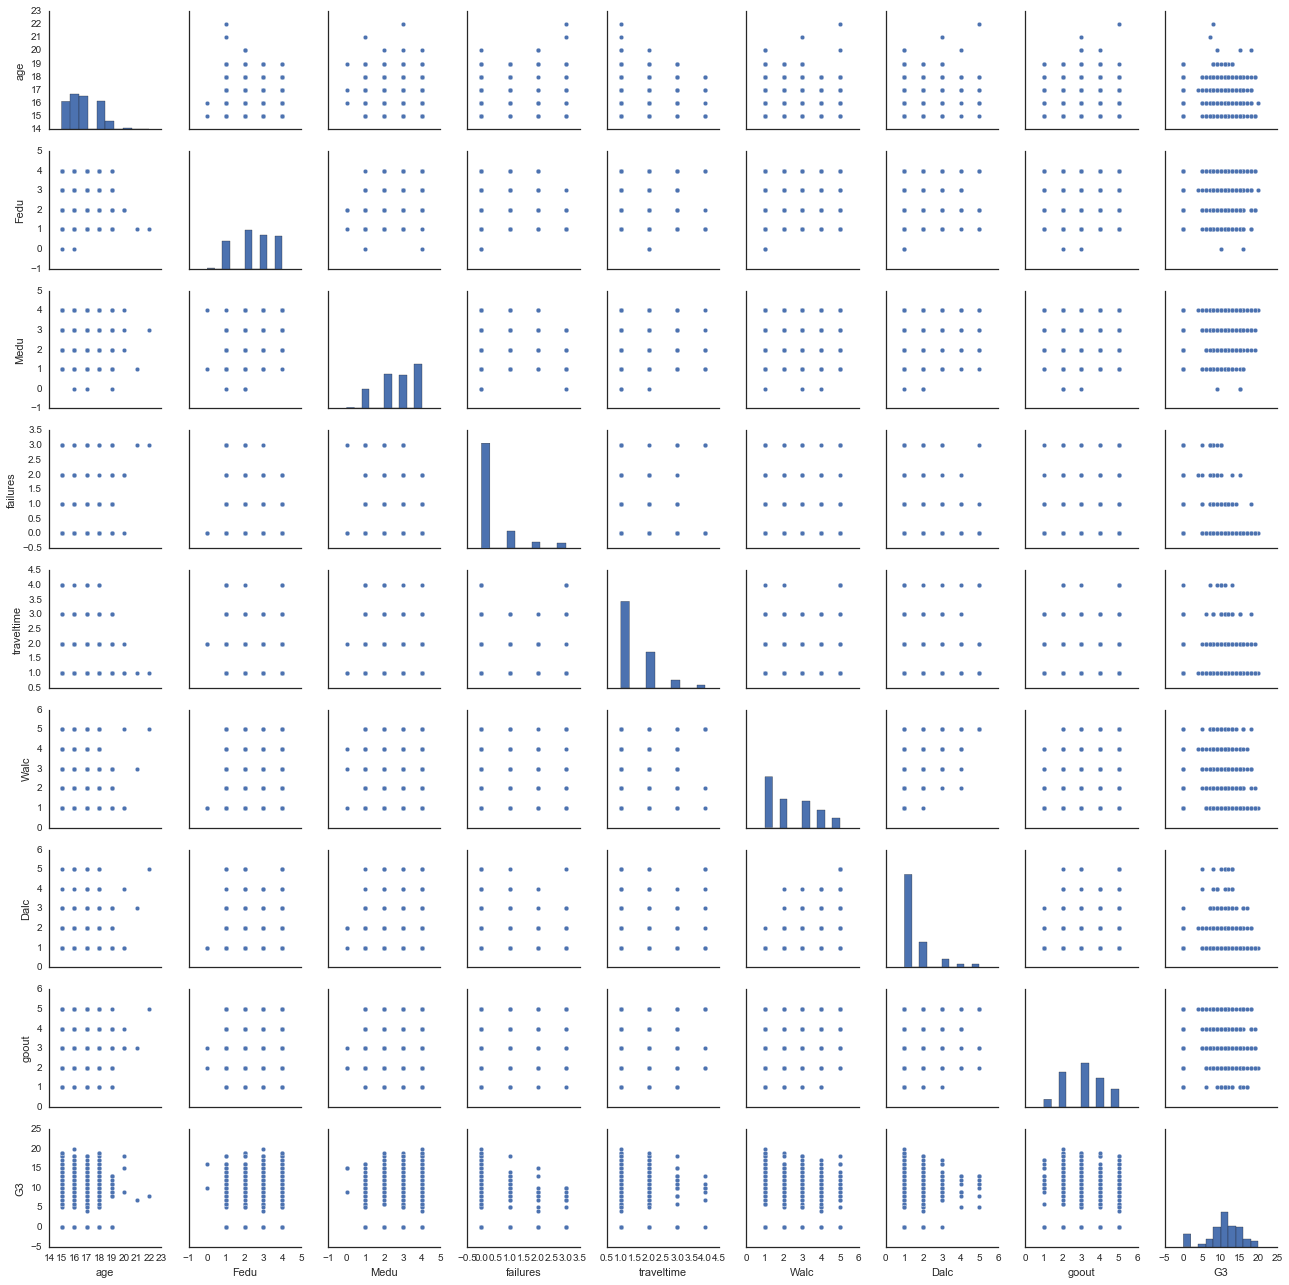

In [12]:
g = sns.pairplot(student_mat[['age','Fedu','Medu','failures','traveltime','Walc','Dalc','goout', 'G3']],size=2)